### Tube removed. Testing characteristics of PFS alone.

**Notes:**

Base pressure is 4.2e-6 mBar.

Tube removed. Just PFS present for comparison

**Conclusion:**

TBD.



### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [1]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [2]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [3]:
data = apl.arrayPlateMeasurement()

In [4]:
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

In [6]:
currents = data.readCurrents(centre5x5 = False)
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [18]:
data.data[-1]['pressure'] = 8e-5 # correct pressure reading
# data.deleteLast()

In [10]:
currents = data.readCurrents(centre5x5=False)
# apl.plotI(currents)
data.append(
    pressure = 2.4e-4,
    Vbias = 125,
    Ibias = 0.983,
    Varc = 73.6,
    Iarc = 5.03,
    Ibase = 29.5,
    currents = currents,
    note = ''
)
data.plotI()

Number of entries: 4


In [11]:
data.save('data')

data_201202_161831.json


In [12]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [2]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201202_161831.json")
# savedData = data

4 entries loaded.


,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
0,201202_160939,125,1.03,71.0,5.05,33.6,0.00024,0.4441,Tube referenced to PFS Vbias.


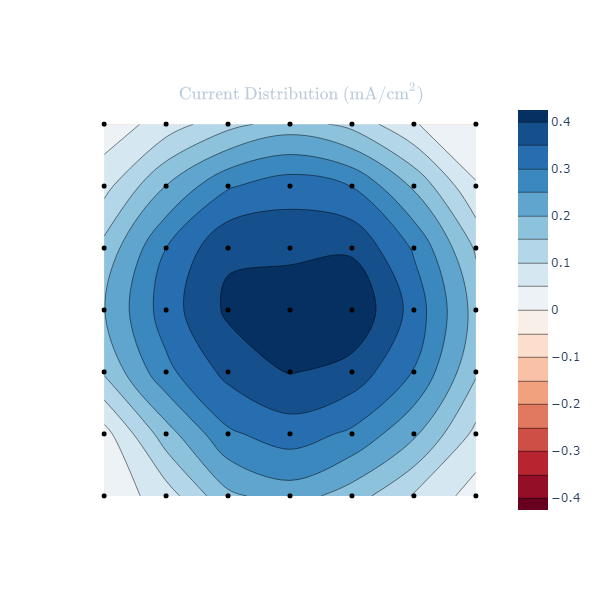

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
1,201202_161214,125,0.725,75.0,3.15,25.8,0.0003,0.3139,


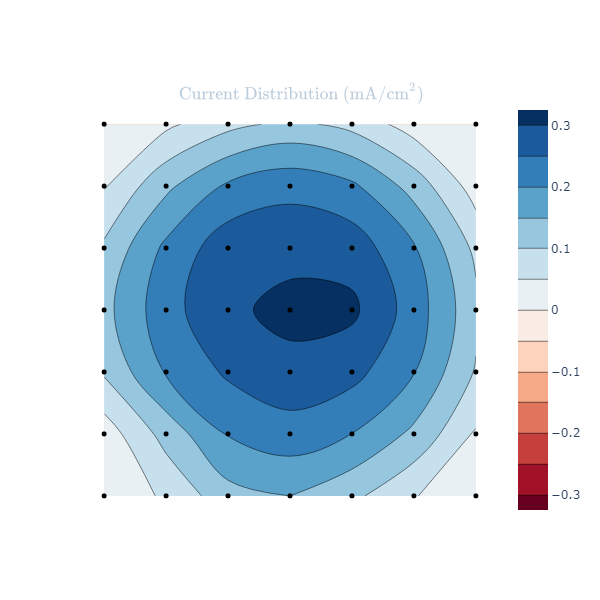

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
2,201202_161442,125,0.825,75.0,3.94,27.3,0.00027,0.3651,


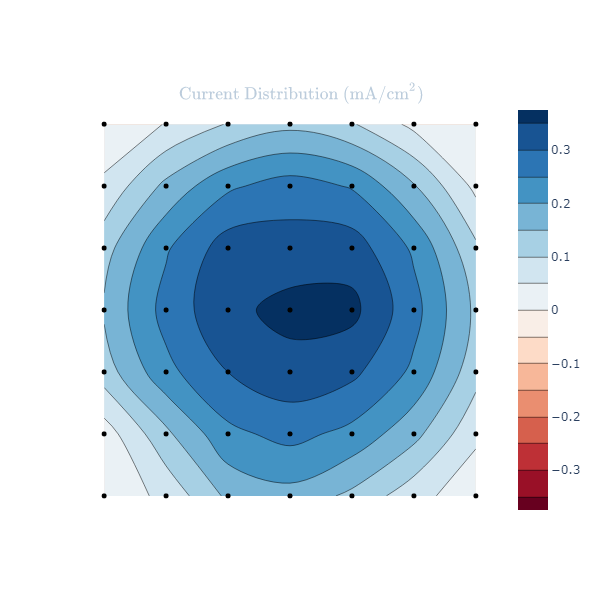

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
3,201202_161745,125,0.983,73.6,5.03,29.5,0.00024,0.4391,


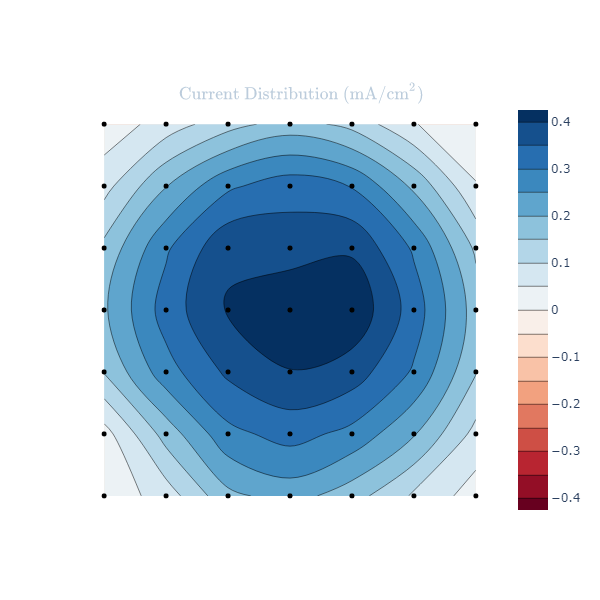

In [3]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
# df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Ve1', 'Ie1', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

IpinMax = []
for currentArray in df.currents:
    IpinMax.append(np.max(currentArray))
    
df = df[['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]
df.insert(7, "IpinMax", IpinMax, True)

for i in range(savedData.len()):
    display(df[i:i+1])
    fig = savedData.plotI(i)
#     fig = plotI(data.data[i]['currents'])
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()

#### Export .csv file where we only need a slice of current through the middle.

In [8]:
df = pd.DataFrame(savedData.data)
df.head()

,pressure,Vbias,Ibias,Varc,Iarc,Ibase,currents,note,time
0,0.00024,125,1.030,71.0,5.05,33.6,"[[0.01485, 0.07525, 0.1892, 0.2251, 0.1753, 0....",Tube referenced to PFS Vbias.,201202_160939
1,0.00030,125,0.725,75.0,3.15,25.8,"[[0.0152, 0.05742, 0.132, 0.1501, 0.1125, 0.05...",,201202_161214
2,0.00027,125,0.825,75.0,3.94,27.3,"[[0.01341, 0.06365, 0.1607, 0.183, 0.1386, 0.0...",,201202_161442
3,0.00024,125,0.983,73.6,5.03,29.5,"[[0.01491, 0.07352, 0.1871, 0.2222, 0.1721, 0....",,201202_161745


In [9]:
df.columns

Index(['pressure', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'currents',
       'note', 'time'],
      dtype='object')

In [10]:
output = df[['time', 'pressure', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'currents', 'note']]
output.head()

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,currents,note
0,201202_160939,0.00024,125,1.030,71.0,5.05,33.6,"[[0.01485, 0.07525, 0.1892, 0.2251, 0.1753, 0....",Tube referenced to PFS Vbias.
1,201202_161214,0.00030,125,0.725,75.0,3.15,25.8,"[[0.0152, 0.05742, 0.132, 0.1501, 0.1125, 0.05...",
2,201202_161442,0.00027,125,0.825,75.0,3.94,27.3,"[[0.01341, 0.06365, 0.1607, 0.183, 0.1386, 0.0...",
3,201202_161745,0.00024,125,0.983,73.6,5.03,29.5,"[[0.01491, 0.07352, 0.1871, 0.2222, 0.1721, 0....",


##### Plot of $I_{base}$ and $I_{PinMax}$ vs Run

In [4]:
x = []
Ibase = []
IpinMax = []
for i, run in enumerate(savedData.data):
    x.append(i)
    Ibase.append(run['Ibase'])
    currents = np.array(run['currents'])
    IpinMax.append(np.max(currents)) 

In [6]:
import plotly.express as px
import numpy as np
# df = px.data.iris()
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
# fig.
fig.update_layout(height=600)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'pressure', 'IpinMax', 'note'] but received: Vtube

In [52]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
fig2 = px.scatter(df, x='Vtube', y='Itube', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

fig3 = px.scatter(df, x='Vtube', y='Ibias', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

# fig2.update_traces(yaxis="y2")
fig3.update_traces(yaxis="y2")
subfig.add_traces(fig.data + fig3.data)
# subfig.layout.xaxis.title="Time"
# subfig.layout.yaxis.title="Linear Y"
# subfig.layout.yaxis2.type="log"
# subfig.layout.yaxis2.title="Log Y"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
# subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()